# Python visualization
Lecturers = R. Patrick Xian, Santosh Adhikari, Sourin Dey<br>
Date = 07/2022
## 1. matplotlib

![Figure](https://matplotlib.org/_images/anatomy.png)

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
%matplotlib inline

In [2]:
!pip show matplotlib

Name: matplotlib
Version: 3.3.4
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\garashch\anaconda3\lib\site-packages
Requires: numpy, pillow, python-dateutil, kiwisolver, cycler, pyparsing
Required-by: seaborn, scikit-image


### 1.1 bar chart

In [3]:
mpl_params = list(rcParams.keys())
print(mpl_params)

['_internal.classic_mode', 'agg.path.chunksize', 'animation.avconv_args', 'animation.avconv_path', 'animation.bitrate', 'animation.codec', 'animation.convert_args', 'animation.convert_path', 'animation.embed_limit', 'animation.ffmpeg_args', 'animation.ffmpeg_path', 'animation.frame_format', 'animation.html', 'animation.html_args', 'animation.writer', 'axes.autolimit_mode', 'axes.axisbelow', 'axes.edgecolor', 'axes.facecolor', 'axes.formatter.limits', 'axes.formatter.min_exponent', 'axes.formatter.offset_threshold', 'axes.formatter.use_locale', 'axes.formatter.use_mathtext', 'axes.formatter.useoffset', 'axes.grid', 'axes.grid.axis', 'axes.grid.which', 'axes.labelcolor', 'axes.labelpad', 'axes.labelsize', 'axes.labelweight', 'axes.linewidth', 'axes.prop_cycle', 'axes.spines.bottom', 'axes.spines.left', 'axes.spines.right', 'axes.spines.top', 'axes.titlecolor', 'axes.titlelocation', 'axes.titlepad', 'axes.titlesize', 'axes.titleweight', 'axes.titley', 'axes.unicode_minus', 'axes.xmargin',

In [5]:
from collections import Counter
tagscounter = Counter([param.split('.')[0] for param in mpl_params])
rankedtags = dict(tagscounter.most_common())
print(rankedtags)

{'boxplot': 37, 'axes': 32, 'figure': 21, 'legend': 19, 'xtick': 19, 'ytick': 19, 'lines': 17, 'keymap': 16, 'animation': 13, 'font': 11, 'mathtext': 10, 'savefig': 10, 'date': 8, 'text': 8, 'image': 7, 'patch': 5, 'path': 5, 'ps': 5, 'grid': 4, 'pdf': 4, 'webagg': 4, 'contour': 3, 'pgf': 3, 'svg': 3, 'hatch': 2, 'scatter': 2, '_internal': 1, 'agg': 1, 'axes3d': 1, 'backend': 1, 'backend_fallback': 1, 'docstring': 1, 'errorbar': 1, 'hist': 1, 'interactive': 1, 'markers': 1, 'mpl_toolkits': 1, 'pcolor': 1, 'polaraxes': 1, 'timezone': 1, 'tk': 1, 'toolbar': 1, 'xaxis': 1, 'yaxis': 1}


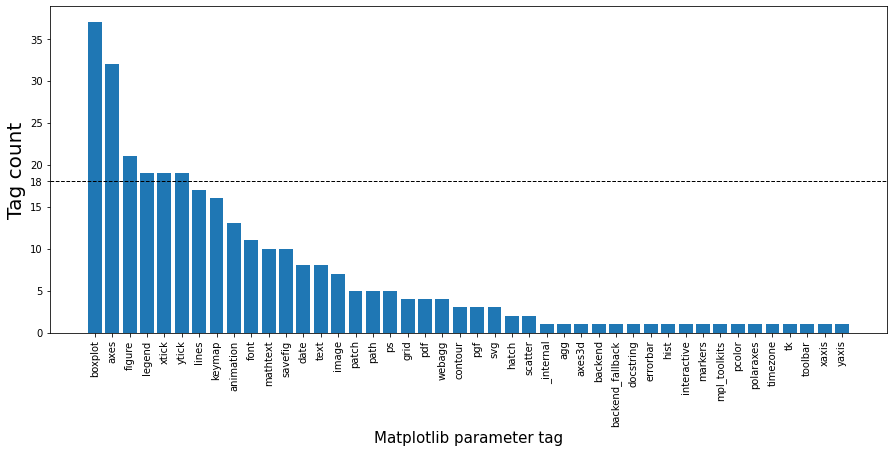

In [6]:
f, ax = plt.subplots(figsize=(15,6))
xpos = range(len(rankedtags))
ax.bar(xpos, rankedtags.values(), align='center')
ax.axhline(y=18, linestyle='--', color='k', linewidth=1)
plt.xticks(xpos, rankedtags.keys(), rotation='vertical')
ax.set_xlabel('Matplotlib parameter tag', fontsize=15)
ax.set_ylabel('Tag count', fontsize=20)
ax.set_yticks(list(range(0,36,5)) + [18]);

In [7]:
def partialstringsearch(strlist, keystr, *, condition='startswith', extrastring=''):
    
    if condition == 'startswith':
        return [k for k in strlist if k.startswith(keystr + extrastring)]
    elif condition == 'endswith':
        return [k for k in strlist if k.endswith(extrastring + keystr)]
    elif condition == 'contain':
        return [k for k in strlist if keystr in k]
    else:
        raise ValueError('The specified search condition is not defined!')

In [8]:
partialstringsearch(mpl_params, 'size', condition='endswith', extrastring='.')

['font.size',
 'xtick.major.size',
 'xtick.minor.size',
 'ytick.major.size',
 'ytick.minor.size']

In [9]:
rcParams['font.size']

10.0

#### Look for paired getter and setter methods from an AxesSubplot object

In [10]:
from collections import Counter

In [11]:
getters, setters = list(map(lambda s: partialstringsearch(dir(ax), s, \
                 condition='startswith', extrastring='_'), ['get', 'set']))
len(getters), len(setters)

(83, 55)

In [12]:
namecount = Counter([g[4:] for g in getters] + [s[4:] for s in setters])
for k, v in namecount.items():
    if v == 2:
        print('get_{}, set_{}'.format(k, k))

get_adjustable, set_adjustable
get_agg_filter, set_agg_filter
get_alpha, set_alpha
get_anchor, set_anchor
get_animated, set_animated
get_aspect, set_aspect
get_autoscale_on, set_autoscale_on
get_autoscalex_on, set_autoscalex_on
get_autoscaley_on, set_autoscaley_on
get_axes_locator, set_axes_locator
get_axisbelow, set_axisbelow
get_box_aspect, set_box_aspect
get_clip_box, set_clip_box
get_clip_on, set_clip_on
get_clip_path, set_clip_path
get_contains, set_contains
get_facecolor, set_facecolor
get_fc, set_fc
get_figure, set_figure
get_frame_on, set_frame_on
get_gid, set_gid
get_in_layout, set_in_layout
get_label, set_label
get_navigate, set_navigate
get_navigate_mode, set_navigate_mode
get_path_effects, set_path_effects
get_picker, set_picker
get_position, set_position
get_rasterization_zorder, set_rasterization_zorder
get_rasterized, set_rasterized
get_sketch_params, set_sketch_params
get_snap, set_snap
get_subplotspec, set_subplotspec
get_title, set_title
get_transform, set_transform
g

More on the [artist](https://matplotlib.org/api/artist_api.html) object in matplotlib (very advanced material alert)

### 1.2 line plot

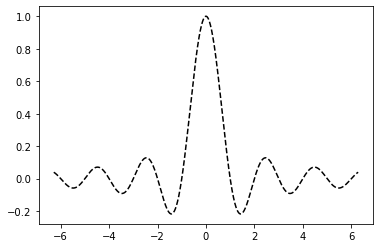

In [13]:
x = np.linspace(-2*np.pi,2*np.pi, 1000)
y = np.sinc(x)
plt.plot(x, y, '--k')

Text(0, 0.5, 'y')

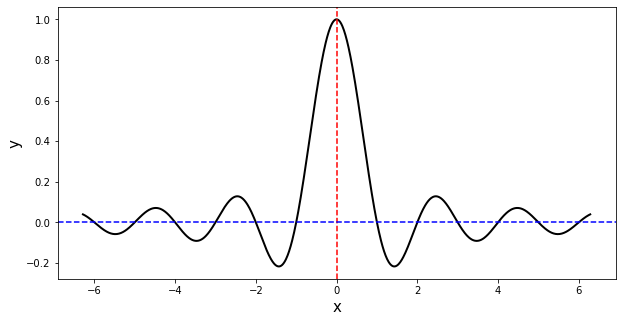

In [14]:
f, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y, 'k', linewidth=2)
ax.axvline(x=0, color='r', linestyle='--')
ax.axhline(y=0, color='b', linestyle='--')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

### [Named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) in matplotlib

Text(0, 0.5, 'y')

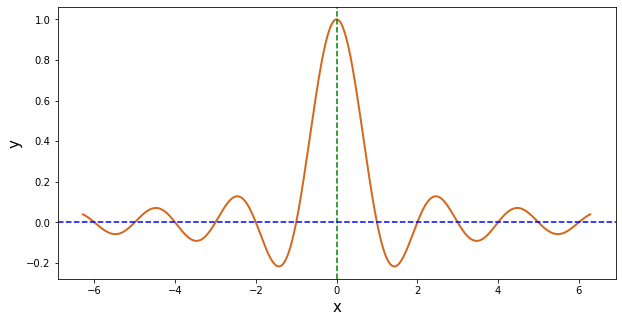

In [17]:
f, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y, 'chocolate', linewidth=2)
ax.axvline(x=0, color='g', linestyle='--')
ax.axhline(y=0, color='b', linestyle='--')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

### 1.3 image plot
Soupcan image taken from [MoMA](https://www.moma.org/calendar/exhibitions/1517) public site.

In [18]:
import matplotlib.image as mpimg

In [19]:
soupcan = mpimg.imread('.\\Warhol_Soupcan.png')
soupcan.shape

(300, 240, 4)

In [20]:
soupcan[0,0,:]

array([0.70980394, 0.68235296, 0.65882355, 1.        ], dtype=float32)

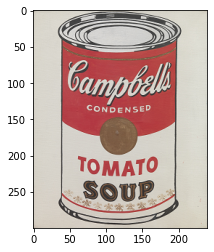

In [21]:
plt.imshow(soupcan);

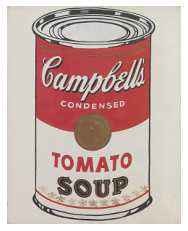

In [22]:
fsc, axsc = plt.subplots()
axsc.imshow(soupcan)
axsc.axis('off');

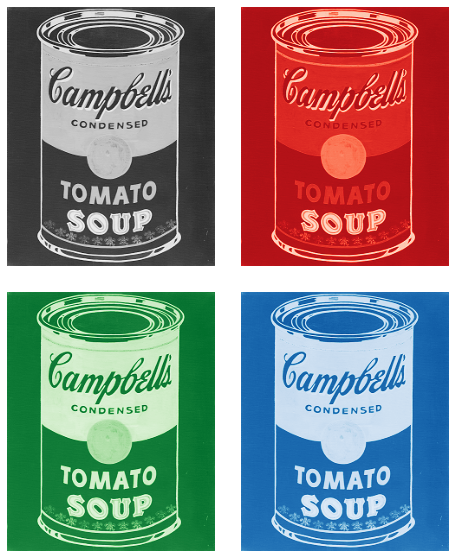

In [23]:
# Make a gridded plot
f, axs = plt.subplots(2, 2, figsize=(8, 10))
r_values, g_values, b_values = soupcan[...,0], soupcan[...,1], soupcan[...,2]
axs[0,0].imshow(0.2989 * r_values + 0.5870 * g_values + 0.1140 * b_values, cmap='Greys')
axs[0,0].axis('off')
axs[0,1].imshow(soupcan[...,0], cmap='Reds')
axs[0,1].axis('off')
axs[1,0].imshow(soupcan[...,1], cmap='Greens')
axs[1,0].axis('off')
axs[1,1].imshow(soupcan[...,2], cmap='Blues')
axs[1,1].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)

#### Make a pyramid plot

In [24]:
def pyramid(nrow=3):
    """Generate a pyramid-shaped nested list with
    only 0's (outside pyramid) and 1's (within pyramid).
    """
    pyramidlist = []
    for i in range(nrow):
        strlist = list('0'*(nrow-i-1) + '1'*(2*i+1) + '0'*(nrow-i-1))
        pyramidlist.append(list(map(int, strlist)))
    return pyramidlist


def pyramid_plot(img, nrow=3, **kwargs):
    """Make a pyramid-grid set of subplots
    """
    # Generate subplot grid
    pmd = np.asarray(pyramid(nrow), dtype='int')
    ncol = pmd.shape[1]
    fg, axg = plt.subplots(nrow, ncol)
    try:
        figsize = kwargs['figsize']
        fg.set_size_inches(figsize)
    except:
        pass
    
    # Make plots
    it = np.nditer(pmd, flags=['multi_index'])
    for val in it:
        inds = it.multi_index
        if val == 0:
            fg.delaxes(axg[inds])
        elif val == 1:
            axg[inds].imshow(img, aspect='auto')
            axg[inds].axis('off')
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

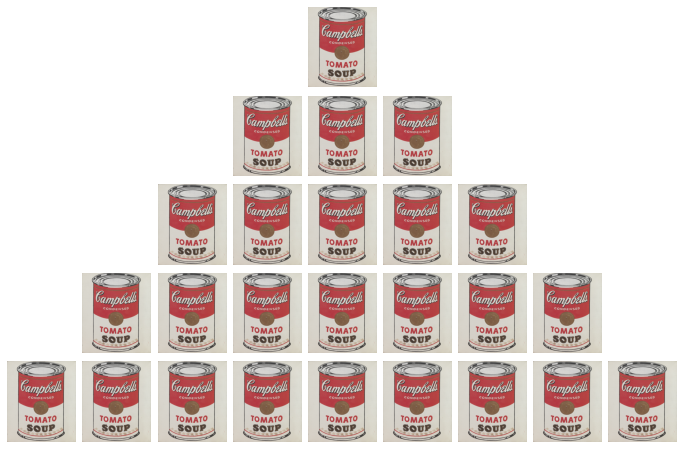

In [25]:
pyramid_plot(soupcan, nrow=5, figsize=(12,8))

### 1.4 scatter plot

In [26]:
x = np.random.ranf(300)
y = np.random.ranf(300)
v = np.random.multivariate_normal([0.5, 0.5], [[1,0], [1,2]], 300)

<ipython-input-26-65752d41e482>:3: RuntimeWarning: covariance is not positive-semidefinite.
  v = np.random.multivariate_normal([0.5, 0.5], [[1,0], [1,2]], 300)


Text(0, 0.5, 'y')

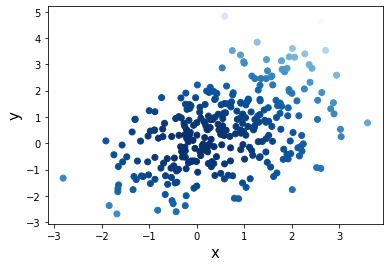

In [27]:
ft, axt = plt.subplots()
axt.scatter(v[:,0], v[:,1], c=v[:,0]**2 + v[:,1]**2, cmap='Blues_r')
axt.set_xlabel('x', fontsize=15)
axt.set_ylabel('y', fontsize=15)

### 1.5 composite plot
More see [gallery](https://matplotlib.org/gallery.html)

### _Joy Division_ || Unknown Pleasures || 1979
A half-hearted attempt at an algorithmic reproduction of the classic album cover, read also [here](https://blogs.scientificamerican.com/sa-visual/pop-culture-pulsar-origin-story-of-joy-division-s-unknown-pleasures-album-cover-video/)

In [28]:
from PIL import Image

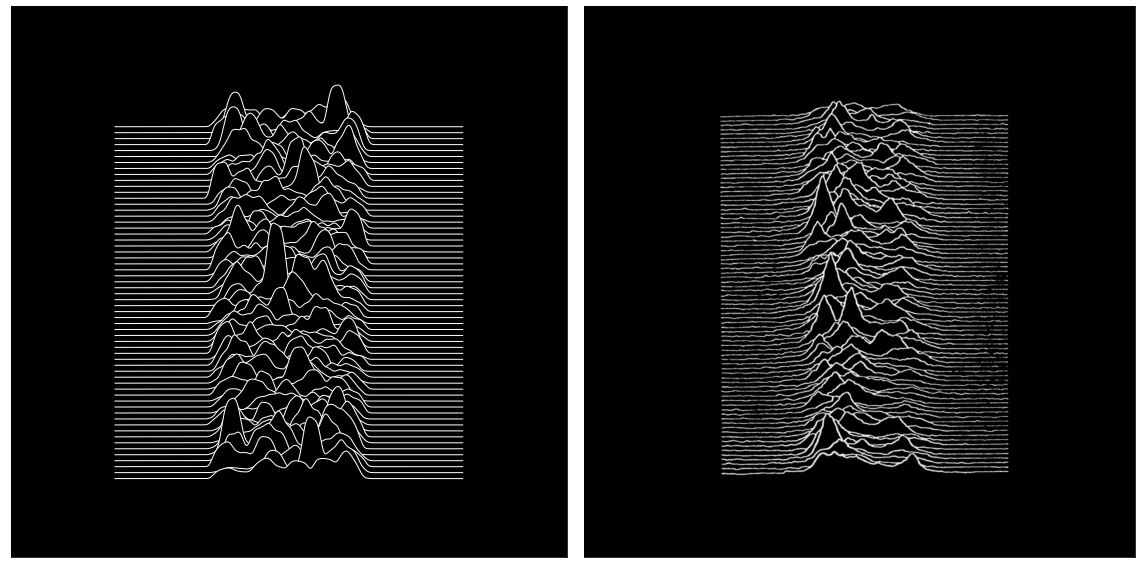

In [29]:
f, axs = plt.subplots(1, 2, figsize=(16,8), facecolor='w')
ax, axcov = axs
ax.set_facecolor('k')

def supergauss(x, x0, sigma, A):

    return A * np.exp(-((x-x0)/sigma)**4)

# Draw ny lines with ng Gaussians each, on an x-axis with nx points
nx, ny, ng = 1000, 60, 80
x = np.linspace(0,10,1000)

y = np.zeros((ny, nx))
for iy in range(ny):
    for ig in range(ng):
        
        # Select the amplitude and position of the Gaussians randomly
        x0 = 4*np.random.random() + 3
        A = 0.9*np.random.lognormal()
        sigma = 0.3
        y[iy,:] += supergauss(x, x0, sigma, A)
    # Offset each line by this amount: we want the first lines plotted
    # at the top of the chart and to work our way down
    offset = (ny-iy)*5
    # Plot the line and fill under it: increase the z-order each time
    # so that lower lines and their fills are plotted over higher ones
    ax.plot(x,y[iy]+offset, 'w', lw=1, zorder=(iy+1)*2)
    ax.fill_between(x, y[iy]+offset, offset, facecolor='k', lw=0, zorder=(iy+1)*2-1)
    
ax.margins(x=0.3, y=0.2)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

jd = Image.open('.\\JoyDivision_UnknownPleasures_1979.jpg')
axcov.imshow(jd)
axcov.axes.get_xaxis().set_visible(False)
axcov.axes.get_yaxis().set_visible(False)
plt.tight_layout()

### 1.6 colors, [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and normalization

In [30]:
import matplotlib as mpl

In [31]:
print([cmp for cmp in dir(mpl.cm) if not cmp.startswith('_')])

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'LUTSIZE', 'MutableMapping', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'ScalarMappable', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cbook', 'cividis', 'cividis_r', 'cmap_d', 'cmaps_listed', 'colors', 'cool', 'cool_r', '

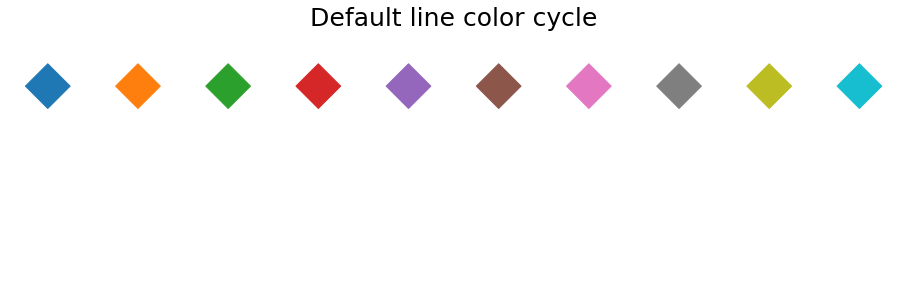

In [32]:
colorcycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
nc = len(colorcycle)

fcm, axcm = plt.subplots(figsize=(16,2))
xpos, ypos = list(range(nc)), [1]*nc
axcm.scatter(xpos, ypos, s=1000, c=colorcycle, marker='D')
axcm.axis('off')
axcm.set_title('Default line color cycle', fontsize=25)
for i, txt in enumerate(xpos):
    axcm.annotate(txt, (xpos[i]-0.1, ypos[i]-0.2), fontsize=25)

In [33]:
x, y = np.meshgrid(np.arange(-4,4,0.01), np.arange(-4,4,0.01))
I = np.sinc(0.5*x**2 + 0.2*y**2)
np.max(I), np.min(I)

(1.0, -0.21723362819921355)

In [34]:
import matplotlib.colors as colors

<ipython-input-35-61c244643c3e>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pm = axs.pcolormesh(x, y, I, cmap='RdBu_r', norm=colors.Normalize(vmin=np.min(I), vmax=np.max(I)))


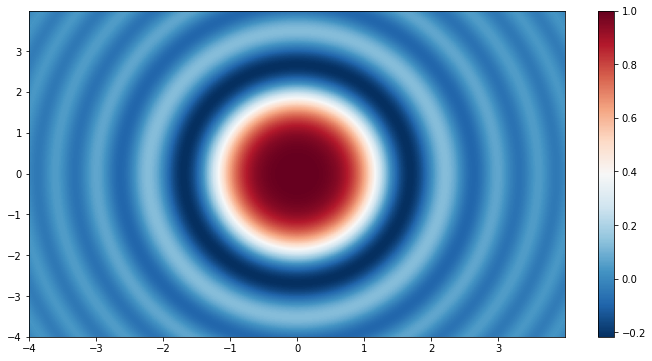

In [35]:
fs, axs = plt.subplots(figsize=(12,6))
pm = axs.pcolormesh(x, y, I, cmap='RdBu_r', norm=colors.Normalize(vmin=np.min(I), vmax=np.max(I)))
fs.colorbar(pm);

In [36]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

<ipython-input-37-b6865c6316fc>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pm = axs.pcolormesh(x,y,I,cmap='RdBu_r',norm=MidpointNormalize(vmax=np.max(I), vmin=np.min(I), midpoint=0));


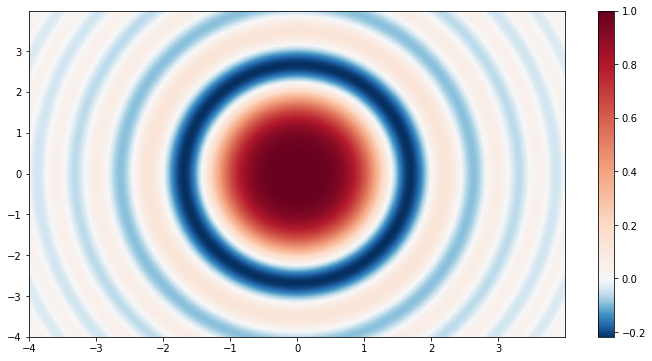

In [37]:
fs, axs = plt.subplots(figsize=(12,6))
pm = axs.pcolormesh(x,y,I,cmap='RdBu_r',norm=MidpointNormalize(vmax=np.max(I), vmin=np.min(I), midpoint=0));
fs.colorbar(pm)

## 2. seaborn

In [38]:
import seaborn as sns

In [39]:
import warnings
warnings.filterwarnings('ignore')

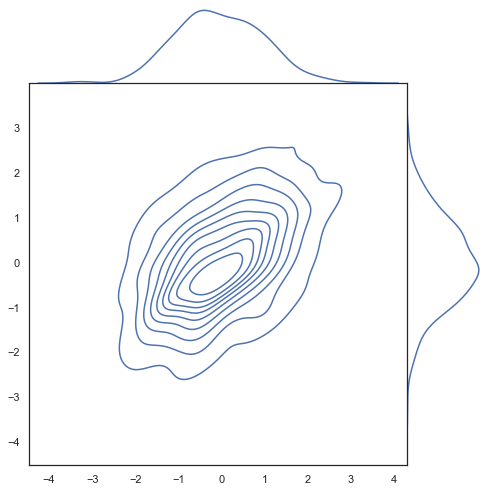

In [40]:
sns.set(style="white")

# Generate a random correlated bivariate dataset
rs = np.random.RandomState(5)
mean = [0, 0]
cov = [(1, .5), (.5, 1)]
x1, x2 = rs.multivariate_normal(mean, cov, 500).T

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

## 3. Others
### 3.1 [ternary plot](https://github.com/marcharper/python-ternary)

In [44]:
%%capture
!pip install python-ternary

In [ ]:
import random
import ternary

def random_points(num_points=25, scale=40):
    points = []
    for i in range(num_points):
        x = random.randint(1, scale)
        y = random.randint(0, scale - x)
        z = scale - x - y
        points.append((x,y,z))
    return points


scale = 60
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)
tax.set_title("Ternary scatter Plot", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="k")

points = random_points(30, scale=scale)
tax.scatter(points, marker='s', color='red', label="Red Squares")
points = random_points(30, scale=scale)
tax.scatter(points, marker='D', color='blue', label="Blue Diamonds")
tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.ax.axis('off');